# Volatility and Average True Range

In [29]:
import numpy as np
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Grab Data
start = dt.datetime(2020, 1, 1)
data = yf.download("NFLX", start)

[*********************100%***********************]  1 of 1 completed


# Average True Range

TR = max[H - L,|H - Cp|, |L - Cp]

In [14]:
high_low = data["High"] - data["Low"]
high_cp = np.abs(data["High"] - data["Close"].shift())
low_cp = np.abs(data["Low"] - data["Close"].shift())

df = pd.concat([high_low, high_cp, low_cp], axis=1)

true_range = np.max(df, axis=1)

In [23]:
average_true_range = true_range.rolling(14).mean()

Text(0, 0.5, 'Price')

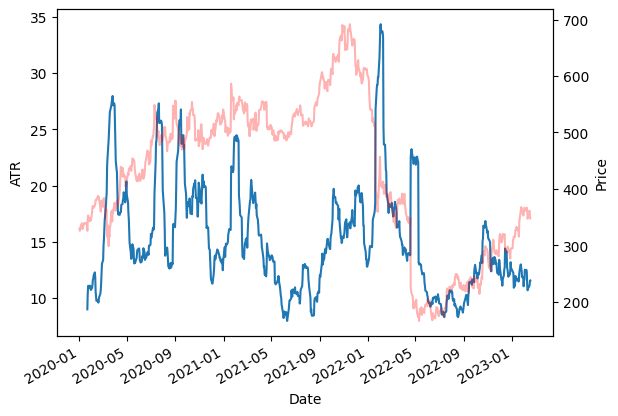

In [36]:
# Average True Range
fig, ax = plt.subplots()

average_true_range.plot(ax=ax)
ax2 = data["Close"].plot(ax=ax, color="red", secondary_y=True, alpha=.3)

ax.set_ylabel("ATR")
ax2.set_ylabel("Price")